# Objective: Customer Segmentation & Behavioral Analysis

### 1. Data Preparation & Exploration
- **Load & Inspect Data:**  
  - Read the dataset and display its shape and first few rows.
  - Check and fill missing values (e.g., replace null Gender with "Unknown").
- **Demographic Overview:**  
  - Plot the gender distribution using a bar chart and a pie chart for the top 100 customers.
- **Data Subsetting:**  
  - Create separate DataFrames for customers with known gender.
  - Further split into male and female subsets.

### 2. Brand Analysis
- **Define Brand Features:**  
  - Identify brand columns (from column index 3 onward).
- **Aggregate Brand Orders:**  
  - Compute total orders for each brand.
  - Visualize overall brand orders with a bar chart.
- **Top Brands Visualization:**  
  - Identify and visualize the top 10 brands with a pie chart.
  - Separate analysis for male and female customers (horizontal bar charts).

### 3. Dimensionality Reduction with PCA
- **Feature Standardization:**  
  - Standardize the brand features.
- **PCA Application:**  
  - Reduce the high-dimensional brand data to 2 principal components.
  - Append the PCA components (PCA1 and PCA2) to the DataFrame.
- **PCA Visualization:**  
  - Plot a scatter plot of customers in 2D PCA space, using total orders as a color gradient.

### 4. Clustering Based on Brand Behavior
- **Elbow Method:**  
  - Determine the optimal number of clusters by plotting inertia vs. number of clusters.
- **K-Means Clustering:**  
  - Apply K-Means clustering (optimal k = 4) on the PCA components.
  - Visualize clusters in PCA space with color-coded clusters and centroids.

### 5. Subclustering by Order Volume
- **Order Binning:**  
  - Define order bins (0-4, 5-8, and 9-12) using a custom function.
- **Combined Subclusters:**  
  - Create a combined subcluster label by merging the original cluster label and the order bin.
- **Subcluster Visualization:**  
  - Plot the subclusters in PCA space with distinct colors.
- **Summary Statistics:**  
  - Compute and display summary statistics (min, max, mean, count of orders) for each subcluster.

## Code

### Importing Necessary Libraries

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches


from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [2]:
print("Current Working Directory:", os.getcwd())

Current Working Directory: E:\NEW_FOLDER\Projects_Java_Python\Customer Segmentation for Market Analysis


### Define Data Path

In [3]:
dataset_path = os.path.join("dataset", "ecom cust seg.csv")

###  Load into DataFrame

In [4]:
# Load dataset
df = pd.read_csv(dataset_path)

In [5]:
df.columns

Index(['Cust_ID', 'Gender', 'Orders', 'Jordan', 'Gatorade', 'Samsung', 'Asus',
       'Udis', 'Mondelez International', 'Wrangler', 'Vans', 'Fila', 'Brooks',
       'H&M', 'Dairy Queen', 'Fendi', 'Hewlett Packard', 'Pladis', 'Asics',
       'Siemens', 'J.M. Smucker', 'Pop Chips', 'Juniper', 'Huawei', 'Compaq',
       'IBM', 'Burberry', 'Mi', 'LG', 'Dior', 'Scabal', 'Tommy Hilfiger',
       'Hollister', 'Forever 21', 'Colavita', 'Microsoft', 'Jiffy mix',
       'Kraft'],
      dtype='object')

In [6]:
df.shape

(30000, 38)

In [7]:
# Display first few rows
print(df.head(5))

   Cust_ID Gender  Orders  Jordan  Gatorade  Samsung  Asus  Udis  \
0        1      M       7       0         0        0     0     0   
1        2      F       0       0         1        0     0     0   
2        3      M       7       0         1        0     0     0   
3        4      F       0       0         0        0     0     0   
4        5    NaN      10       0         0        0     0     0   

   Mondelez International  Wrangler  ...  LG  Dior  Scabal  Tommy Hilfiger  \
0                       0         0  ...   0     0       0               0   
1                       0         0  ...   0     1       0               0   
2                       0         0  ...   0     0       0               0   
3                       0         0  ...   0     0       0               0   
4                       0         0  ...   0     0       2               0   

   Hollister  Forever 21  Colavita  Microsoft  Jiffy mix  Kraft  
0          0           0         0          0          0

### Check Null or NaN values

In [8]:
# Check for missing values
print(df.isnull().sum())

Cust_ID                      0
Gender                    2724
Orders                       0
Jordan                       0
Gatorade                     0
Samsung                      0
Asus                         0
Udis                         0
Mondelez International       0
Wrangler                     0
Vans                         0
Fila                         0
Brooks                       0
H&M                          0
Dairy Queen                  0
Fendi                        0
Hewlett Packard              0
Pladis                       0
Asics                        0
Siemens                      0
J.M. Smucker                 0
Pop Chips                    0
Juniper                      0
Huawei                       0
Compaq                       0
IBM                          0
Burberry                     0
Mi                           0
LG                           0
Dior                         0
Scabal                       0
Tommy Hilfiger               0
Holliste

In [9]:
# replace null gender with unknown

df['Gender'].fillna('Unknown', inplace=True)

### Visualise Gender Distribution

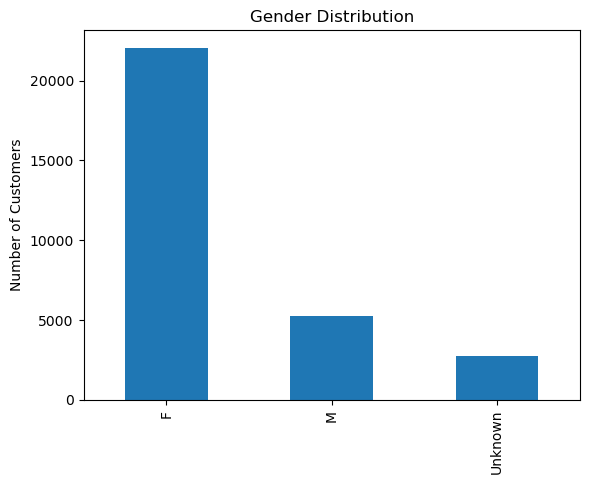

In [10]:
gender_counts = df['Gender'].value_counts()
gender_counts.plot(kind='bar', title='Gender Distribution')
plt.ylabel('Number of Customers')
plt.show()

### Get top 100 customers

F          77
M          19
Unknown     4
Name: Gender, dtype: int64


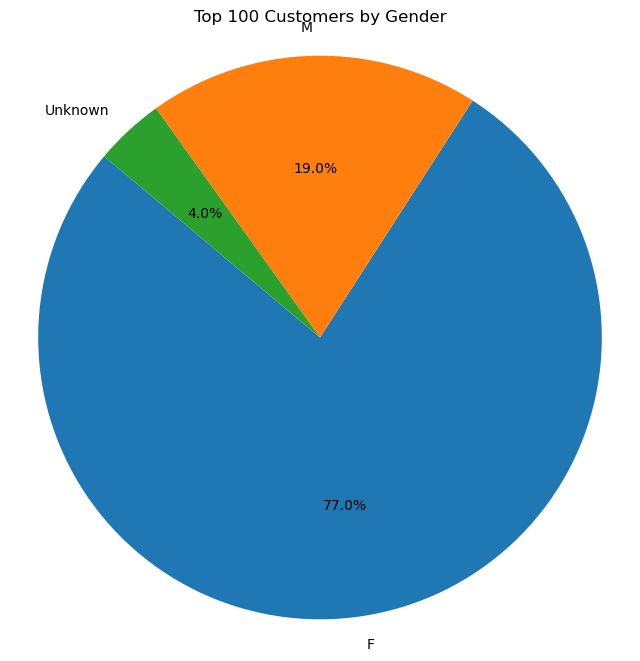

In [11]:
# Sort by orders in descending order and take top 100 customers
sorted_df = df.sort_values(by='Orders', ascending=False)

# Select the top 100 customers
top_customers = sorted_df.head(100)

gender_counts = top_customers['Gender'].value_counts()

# Print the counts to see what we have
print(gender_counts)

# Plot a pie chart
plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 100 Customers by Gender')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.show()

### Filter dataframe based on gender (remove unknown)

In [12]:
df_no_unknown = df[df['Gender']!="Unknown"].copy()

### Create 2 separate dataframes for M/F genders

In [13]:
df_male = df_no_unknown[df_no_unknown['Gender'] == 'M']
df_female = df_no_unknown[df_no_unknown['Gender'] == 'F']

print("Male customers:", df_male.shape)
print("Female customers:", df_female.shape)

Male customers: (5222, 38)
Female customers: (22054, 38)


### Orders per brand

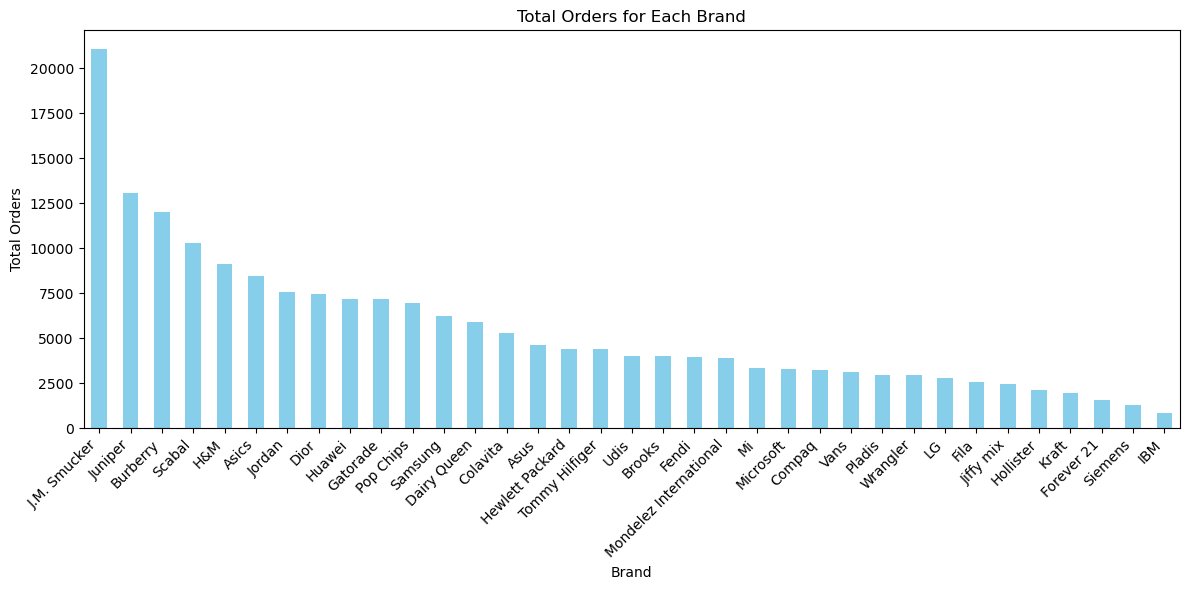

In [14]:
# Define brand columns
brand_columns = df_no_unknown.columns[3:]

# Sum the actual values for each brand column
brand_order_totals = df_no_unknown[brand_columns].sum().sort_values(ascending=False)

# Plotting the bar chart
plt.figure(figsize=(12,6))
brand_order_totals.plot(kind='bar', color='skyblue')
plt.title('Total Orders for Each Brand')
plt.xlabel('Brand')
plt.ylabel('Total Orders')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Top 10 brands contribution

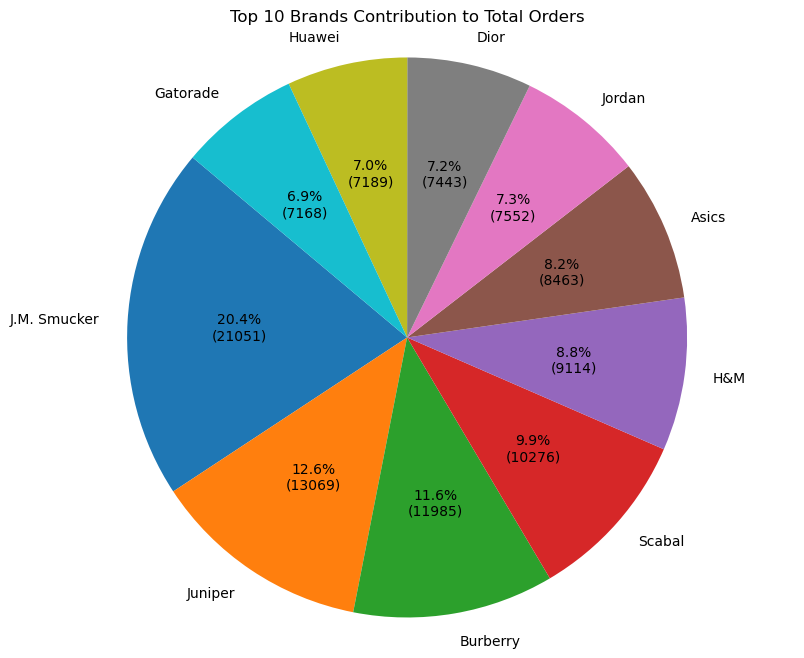

In [15]:
# Calculate total orders per brand across all customers
brand_order_totals = df_no_unknown[brand_columns].sum()

# Extract top 10 brands by total orders
top_10_brands = brand_order_totals.sort_values(ascending=False).head(10)

# Plot a pie chart for top 10 brands with percentage contribution relative to total orders
plt.figure(figsize=(10, 8))
plt.pie(top_10_brands,
        labels=top_10_brands.index,
        autopct=lambda p: f'{p:.1f}%\n({int(p/100.*top_10_brands.sum())})',
        startangle=140)
plt.title('Top 10 Brands Contribution to Total Orders')
plt.axis('equal')  # Ensure the pie chart is circular.
plt.show()

### Seggregate top 10 brands genderwise

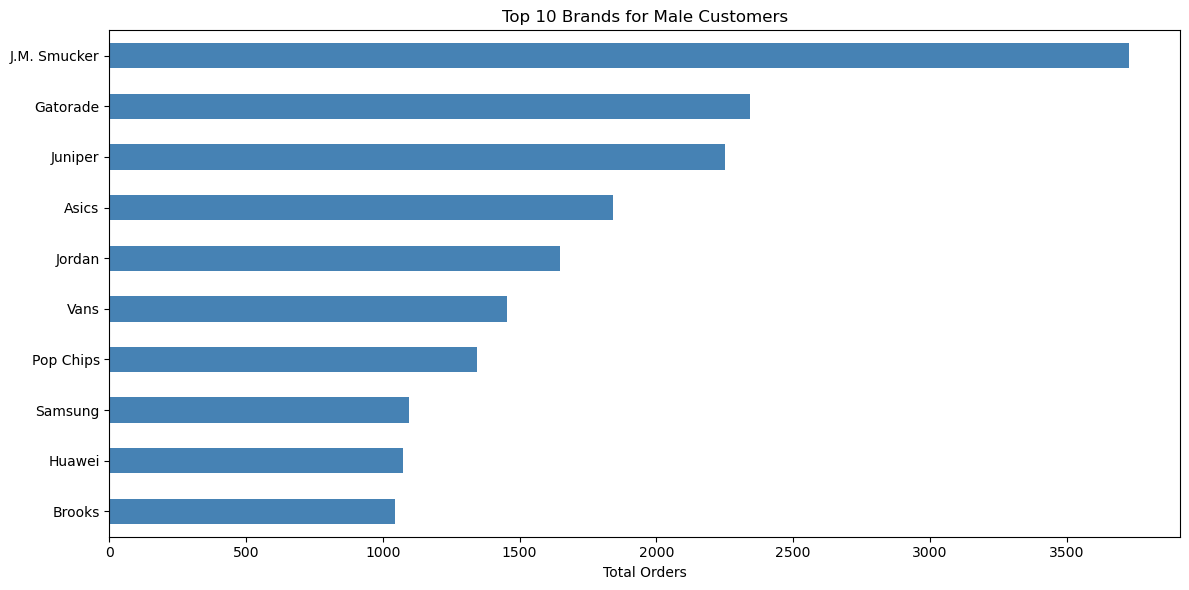

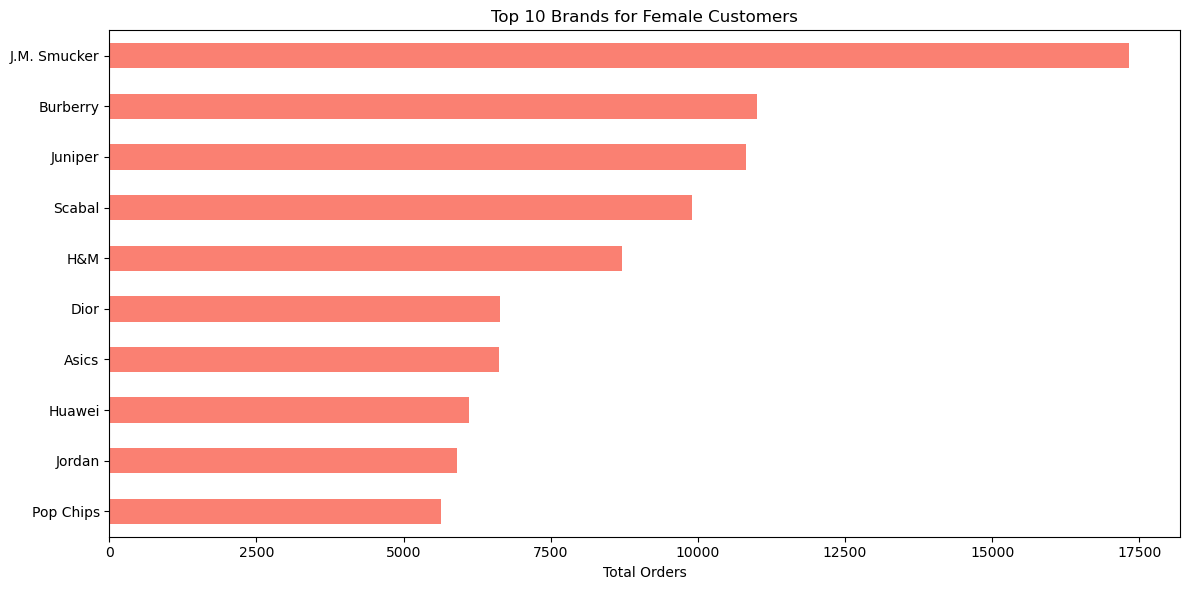

In [16]:
# For male customers: sum brand values and extract top 10 brands
male_brand_sums = df_male[brand_columns].sum().sort_values(ascending=False)
top_10_male_brands = male_brand_sums.head(10)

# For female customers: sum brand values and extract top 10 brands
female_brand_sums = df_female[brand_columns].sum().sort_values(ascending=False)
top_10_female_brands = female_brand_sums.head(10)

# Plotting for male customers
plt.figure(figsize=(12, 6))
top_10_male_brands.sort_values().plot(kind='barh', color='steelblue')
plt.xlabel('Total Orders')
plt.title('Top 10 Brands for Male Customers')
plt.tight_layout()
plt.show()

# Plotting for female customers
plt.figure(figsize=(12, 6))
top_10_female_brands.sort_values().plot(kind='barh', color='salmon')
plt.xlabel('Total Orders')
plt.title('Top 10 Brands for Female Customers')
plt.tight_layout()
plt.show()

### Customer Distribution by Brand Behavior: PCA Projection

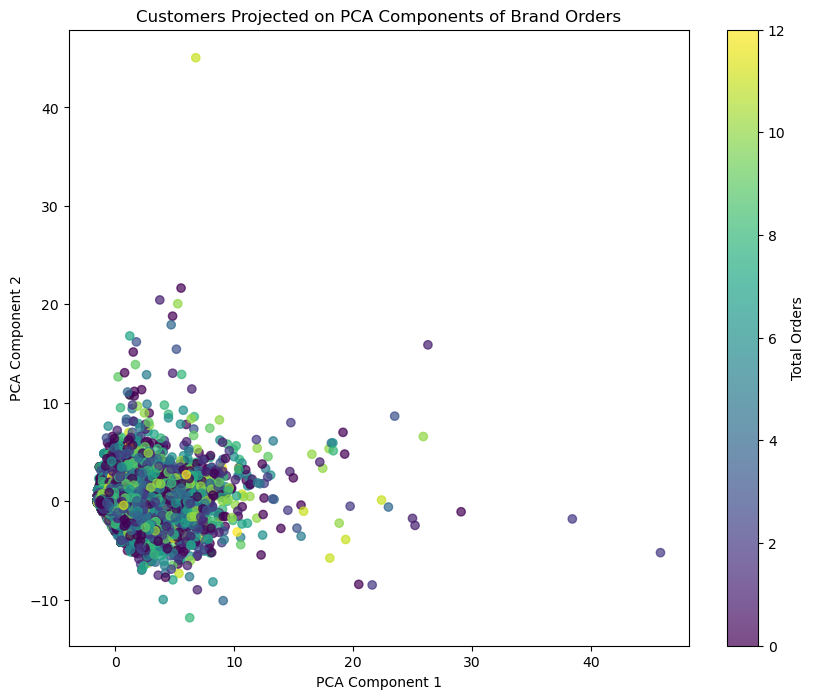

In [17]:
# Assume df_no_unknown is your cleaned DataFrame and brand_columns are defined as:
brand_columns = df_no_unknown.columns[3:]

# Extract brand features (each customer is a row with values for each brand)
X = df_no_unknown[brand_columns].values

# Standardize the features (recommended before PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA to reduce dimensions to 2 components
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

# Add the PCA components to the DataFrame
df_no_unknown['PCA1'] = X_pca[:, 0]
df_no_unknown['PCA2'] = X_pca[:, 1]

# Optionally, use total orders for a color map or size:
orders = df_no_unknown['Orders']

# Plot the scatter plot of the customers in the PCA space
plt.figure(figsize=(10, 8))
scatter = plt.scatter(df_no_unknown['PCA1'], df_no_unknown['PCA2'], 
                      c=orders, cmap='viridis', alpha=0.7)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Customers Projected on PCA Components of Brand Orders')
cbar = plt.colorbar(scatter)
cbar.set_label('Total Orders')
plt.show()

### Elbow method for Optimal number of clusters, K

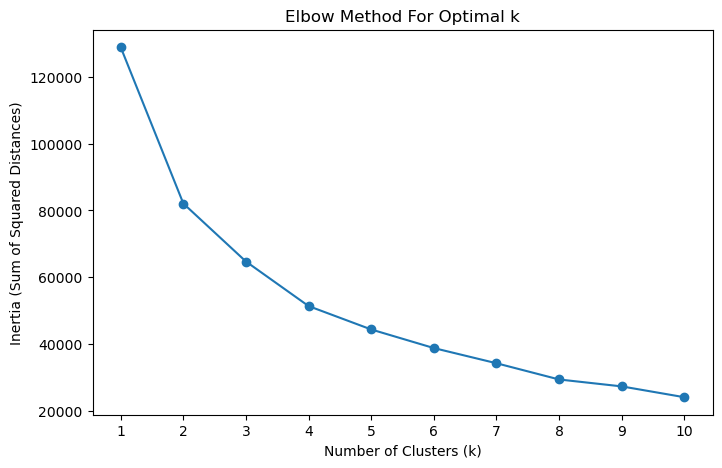

In [18]:
# ----- Determine optimal number of clusters using the elbow method -----
inertias = []
cluster_range = range(1, 11)  # try from 1 to 10 clusters

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)
    inertias.append(kmeans.inertia_)  # inertia: sum of squared distances

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, inertias, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.title('Elbow Method For Optimal k')
plt.xticks(cluster_range)
plt.show()

### Customer Segmentation by Brand Behavior and Order Volume: PCA-based Clusters and Order Subclusters

#### Customers are first segmented based on their brand purchase behavior (using PCA and KMeans). Then, within those clusters, customers are further segmented into subclusters based on order volume using predefined bins (0-4, 5-8, 9-12).

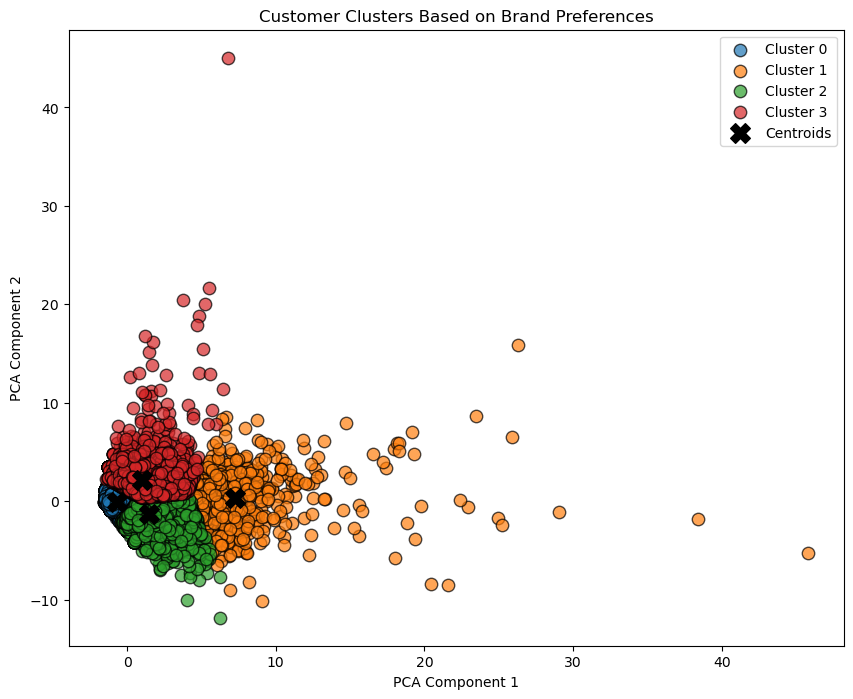

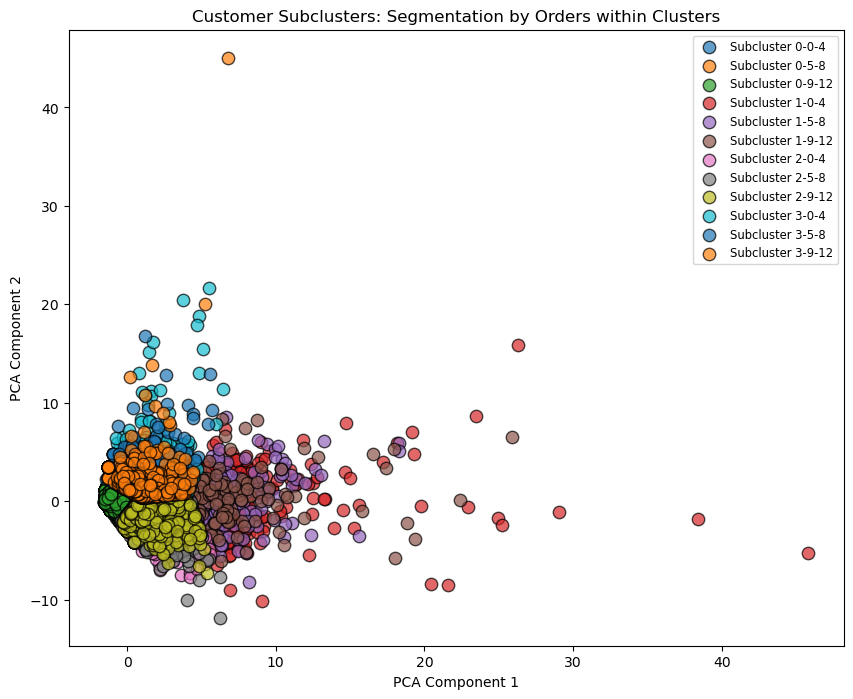

Subcluster Summary (Orders):
            min  max      mean  count
Subcluster                           
0-0-4         0    4  1.350150  11021
0-5-8         5    8  6.520388   5469
0-9-12        9   12  9.890538   3234
1-0-4         0    4  1.400990    404
1-5-8         5    8  6.432432    185
1-9-12        9   12  9.991228    114
2-0-4         0    4  1.602344   2218
2-5-8         5    8  6.529641   1282
2-9-12        9   12  9.818308    721
3-0-4         0    4  1.499299   1426
3-5-8         5    8  6.503201    781
3-9-12        9   12  9.821853    421


In [19]:
import matplotlib.patches as mpatches
import matplotlib.cm as cm
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Step 1: Cluster customers based on brand purchase behavior using PCA components
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df_no_unknown['Cluster'] = kmeans.fit_predict(X_pca)

# Assign colors to clusters
colors = [cm.tab10(i) for i in range(optimal_k)]
df_no_unknown['Color'] = df_no_unknown['Cluster'].apply(lambda x: colors[x])

# Visualizing clusters in PCA space
plt.figure(figsize=(10, 8))
for cluster in range(optimal_k):
    cluster_data = df_no_unknown[df_no_unknown['Cluster'] == cluster]
    plt.scatter(cluster_data['PCA1'], cluster_data['PCA2'],
                color=colors[cluster], alpha=0.7, s=80, edgecolor='k', label=f'Cluster {cluster}')

# Highlight cluster centers
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], marker='X', s=200, color='black', label='Centroids')

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Customer Clusters Based on Brand Preferences')
plt.legend(loc='best')
plt.show()

# Step 2: Further segment customers within each cluster based on order volume
def assign_order_bin(order):
    if 0 <= order <= 4:
        return "0-4"
    elif 5 <= order <= 8:
        return "5-8"
    elif 9 <= order <= 12:
        return "9-12"
    else:
        return "Other"

df_no_unknown['Order_Bin'] = df_no_unknown['Orders'].apply(assign_order_bin)
df_no_unknown['Subcluster'] = df_no_unknown['Cluster'].astype(str) + "-" + df_no_unknown['Order_Bin']

# Step 3: Visualize subclusters in PCA space
unique_subclusters = sorted(df_no_unknown['Subcluster'].unique())
subcluster_colors = {sub: cm.tab10(i % 10) for i, sub in enumerate(unique_subclusters)}

plt.figure(figsize=(10, 8))
for sub in unique_subclusters:
    sub_data = df_no_unknown[df_no_unknown['Subcluster'] == sub]
    plt.scatter(sub_data['PCA1'], sub_data['PCA2'],
                color=subcluster_colors[sub], alpha=0.7, s=80, edgecolor='k', label=f'Subcluster {sub}')

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Customer Subclusters: Segmentation by Orders within Clusters')
plt.legend(loc='best', fontsize='small')
plt.show()

# Step 4: Summary statistics for subclusters
subcluster_summary = df_no_unknown.groupby('Subcluster')['Orders'].agg(['min', 'max', 'mean', 'count'])
print("Subcluster Summary (Orders):")
print(subcluster_summary)